In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import preprocessingV1
import visualization
import librosa
from copy import deepcopy as dc

# Visualizing the signal

I plot the signal with different colors correspond to different waveforms

In [3]:
filename = '0zt_2022-10-01-ch5'
extension = ['.A01','.A02','.A03','.A04','.A05','.A06','.A07','.A08']
os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel')
data = {}
wave_array, ana = preprocessingV1.read_signal(filename)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wave_array_scaled = scaler.fit_transform(wave_array.reshape(-1,1)).reshape(-1,1)

wave_array_outlier, ana_outlier = preprocessingV1.outlier_filtering(wave_array_scaled, ana)

In [ ]:
d, l  = preprocessingV1.generate_data(wave_array,ana,mode = 'cnn1d')

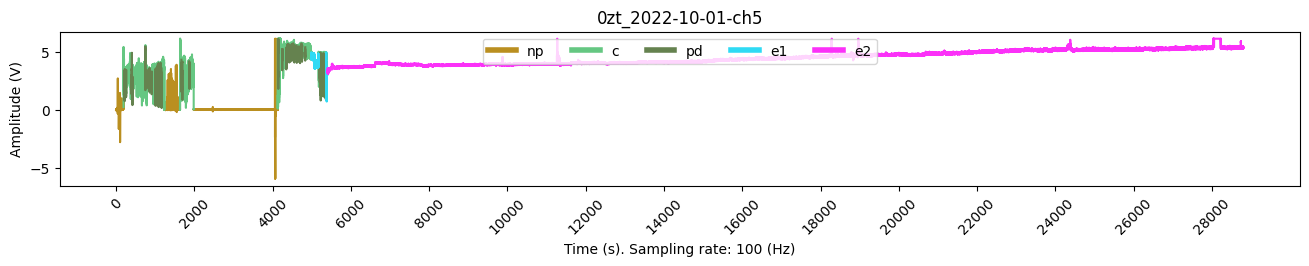

In [4]:
visualization.visualize_wave(wave_array,ana)
plt.title(f'{filename}')
plt.show()

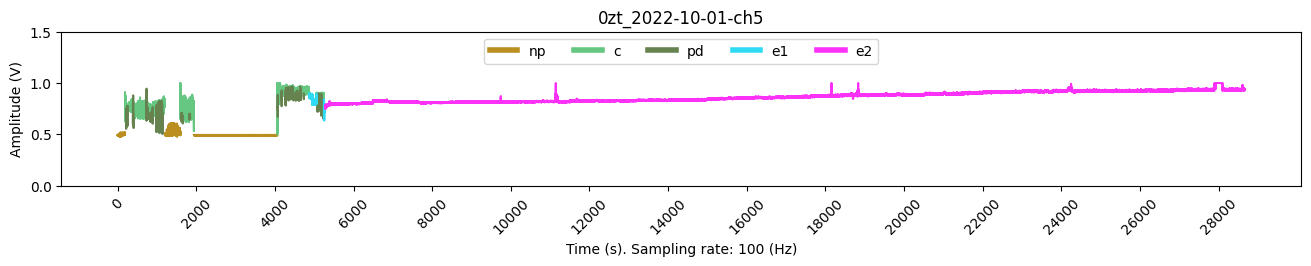

In [5]:
visualization.visualize_wave(wave_array_outlier,ana_outlier)
plt.ylim(0,1.5)
plt.title(f'{filename}')
plt.show()

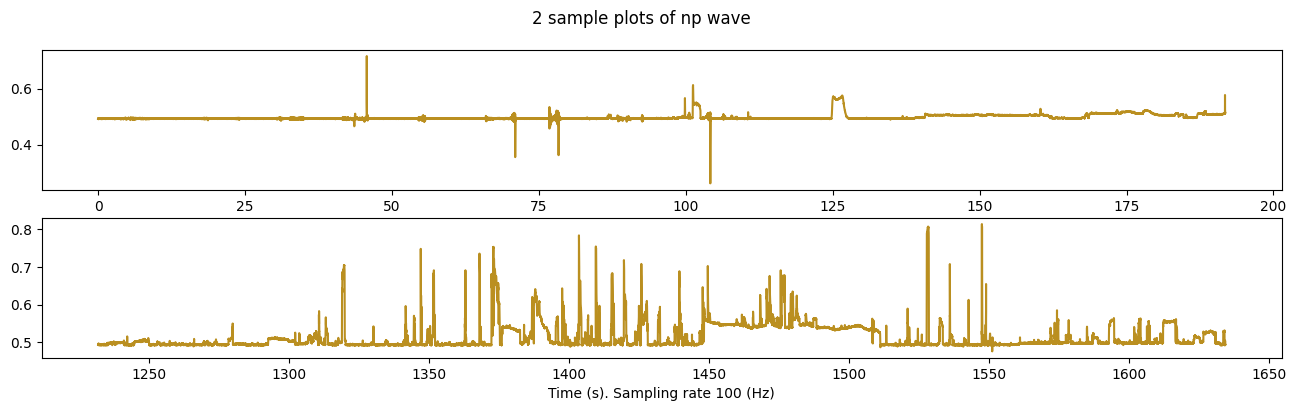

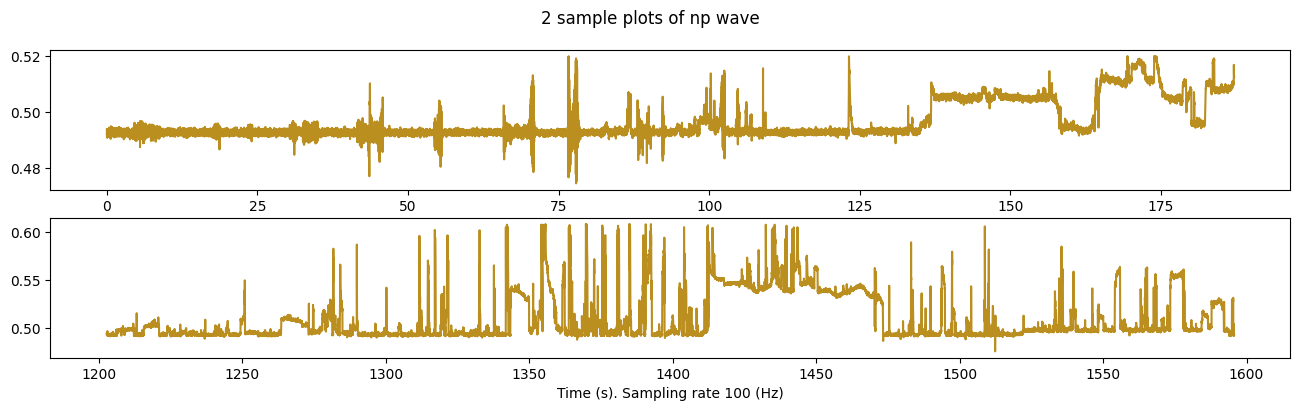

In [6]:
visualization.visualize_wave(wave_array_scaled,ana,'np',n_plots = 2)
visualization.visualize_wave(wave_array_outlier,ana_outlier,'np',n_plots = 2)

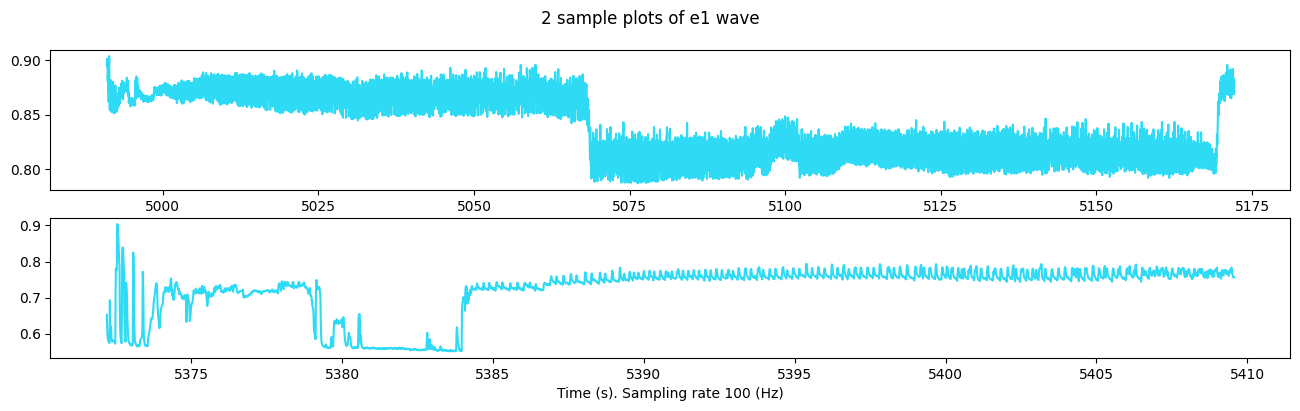

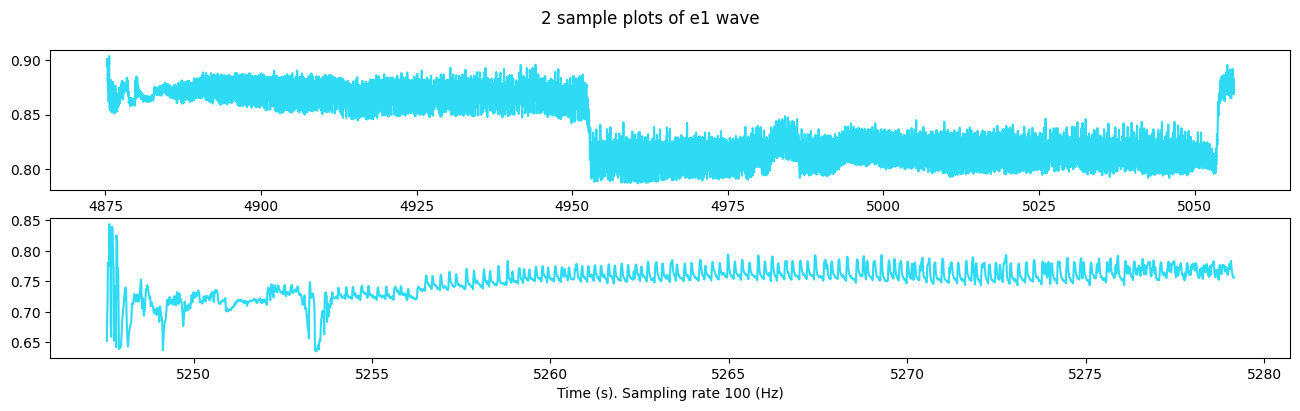

In [7]:
visualization.visualize_wave(wave_array_scaled,ana,'e1',n_plots = 2)
visualization.visualize_wave(wave_array_outlier,ana_outlier,'e1',n_plots = 2)

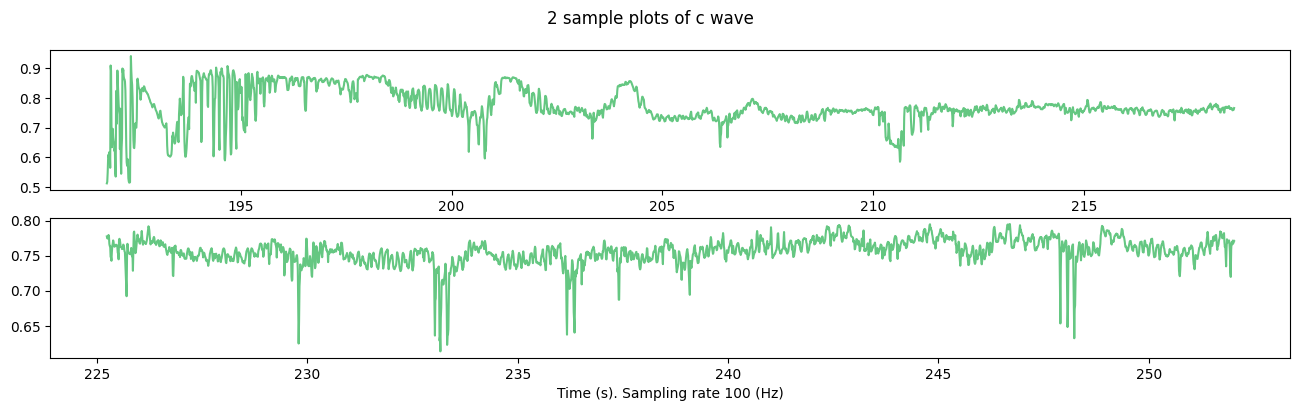

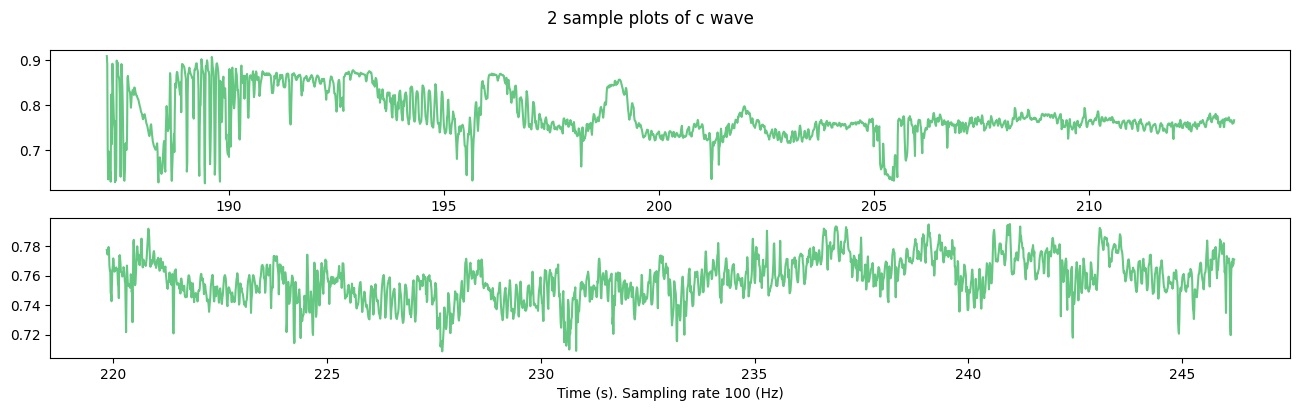

In [8]:
visualization.visualize_wave(wave_array_scaled,ana,'c',n_plots = 2)
visualization.visualize_wave(wave_array_outlier,ana_outlier,'c',n_plots = 2)

# Resample short waveform

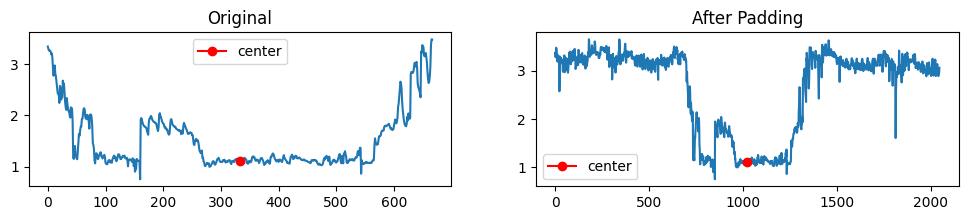

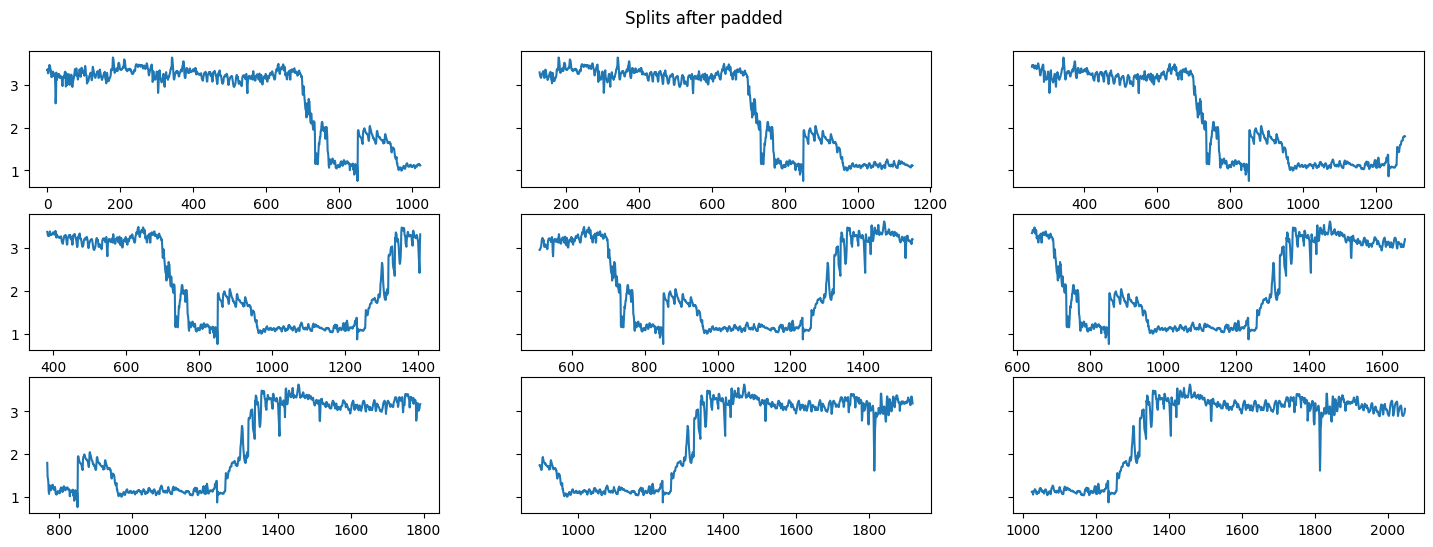

In [ ]:
window_size = 1024
hop_length = 256

f,ax = plt.subplots(1,2,figsize = (12,2))

wave_indices = preprocessingV1.get_index(ana)
start,end = wave_indices['pd'][0]
ax[0].plot(wave_array[start:end])
ax[0].plot(667//2,wave_array[(start+end)//2],'r',marker = 'o',label = 'center')
ax[0].set_title('Original')
ax[0].legend()

start, end = (start+end)//2 - window_size, (start+end)//2 + window_size
ax[1].plot(wave_array[start:end])
ax[1].plot(2048//2,wave_array[(start+end)//2],'r',marker = 'o',label = 'center')
ax[1].set_title('After Padding')
ax[1].legend()
plt.show()

sample = wave_array[start:end]
n_windows = ((end-start)-window_size)//128 + 1
splits = []
for n in range(n_windows):
    splits.append(sample[128*n:128*n+window_size])

f,ax = plt.subplots(3,3,figsize = (18,6),sharey = True)
for n in range(n_windows):
    ax[n//3,n%3].plot(np.arange(128*n,128*n+window_size),splits[n])
plt.suptitle('Splits after padding',y=0.95)
plt.show()
    

# Filter the Outlier

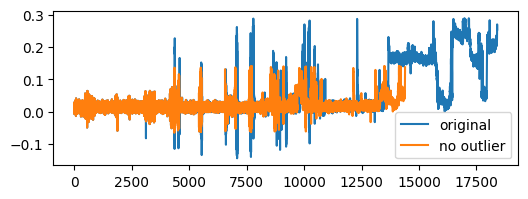

In [ ]:
#This demonstrate the outlier filtering process
plt.figure(figsize = (6,2))
outlier_filtered_sample = preprocessingV1.outlier_filtering(wave_array = sample,option = 'indiv')
outlier_filtered_denoised_sample = preprocessingV1.wavelet_denoising(outlier_filtered_sample,'sym4',3)
plt.plot(sample,label = 'original')
plt.plot(outlier_filtered_sample,label = 'no outlier')

plt.legend()


# Wavelet transform

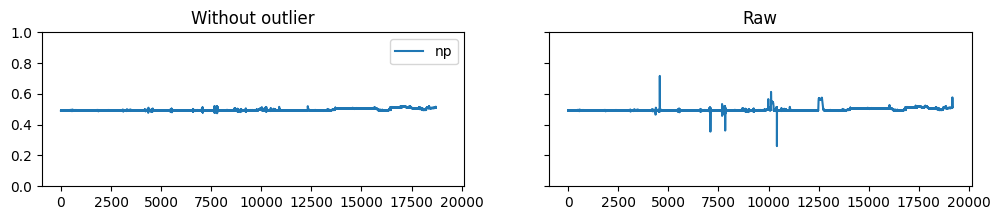

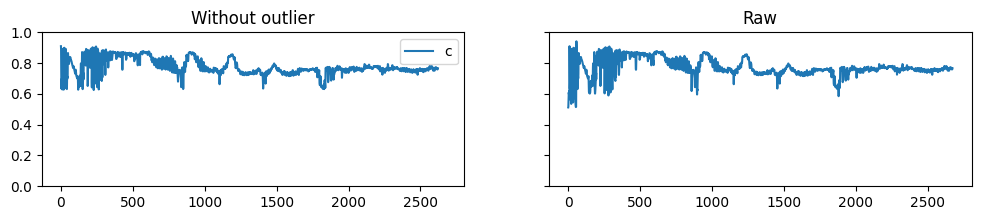

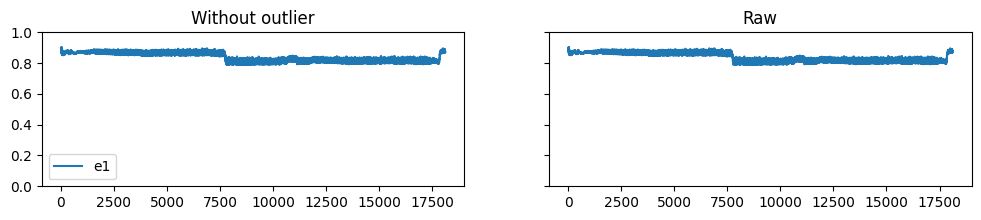

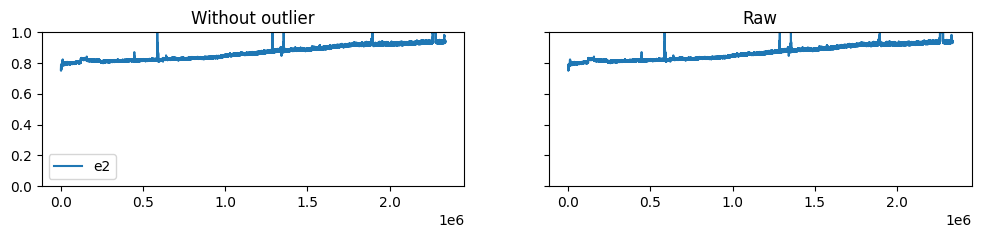

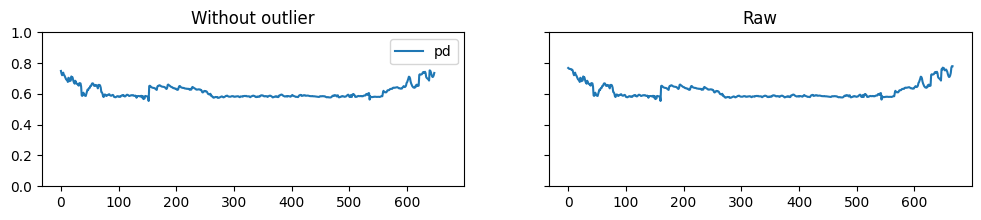

In [48]:
def compare_outlier_filter_vs_none(wavetype):
    _, (ax1,ax2) = plt.subplots(1,2,figsize = (12,2),sharex = True,sharey = True)
    ax1.plot(preprocessingV1.extract_sample(wave_array_outlier,ana_outlier,wavetype,0),label = wavetype)
    ax1.set_ylim(0,1)
    ax1.set_title('Without outlier')
    ax1.legend()

    ax2.plot(preprocessingV1.extract_sample(wave_array_scaled,ana,wavetype,0))
    ax2.set_ylim(0,1)
    ax2.set_title('Raw')

compare_outlier_filter_vs_none('np')
compare_outlier_filter_vs_none('c')
compare_outlier_filter_vs_none('e1')
compare_outlier_filter_vs_none('e2')
compare_outlier_filter_vs_none('pd')

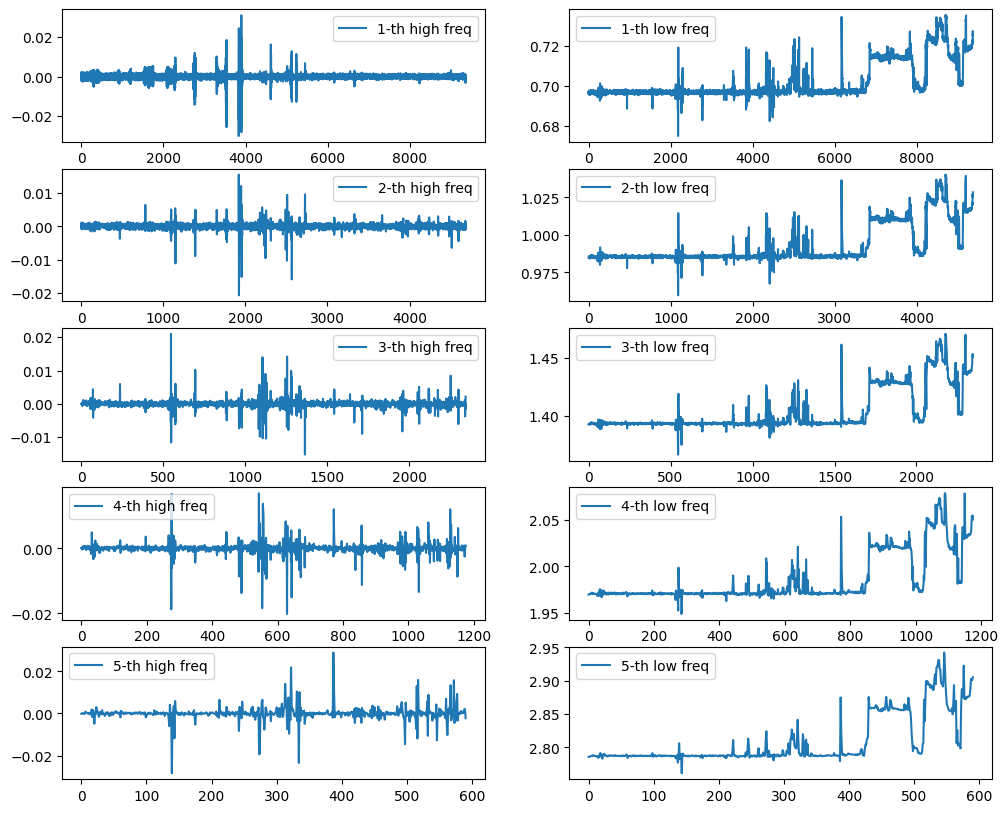

In [44]:
sample = preprocessingV1.extract_sample(wave_array_outlier,ana_outlier,'np',0)
low_freq,high_freq = preprocessingV1.get_wavelet_coefficients(sample,'sym4',n_level=5)
visualization.visualize_wavelet_coefficients(low_freq,high_freq)

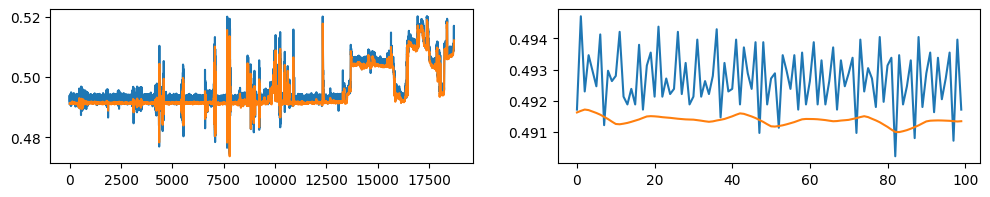

In [45]:
_,(ax1,ax2) = plt.subplots(1,2,figsize = (12,2))
denoised_sample = preprocessingV1.wavelet_denoising(sample,'sym4',3)
ax1.plot(sample)
ax1.plot(denoised_sample)
ax2.plot(sample[200:300])
ax2.plot(denoised_sample[200:300])

**Comment** We need to be careful with denoising using wavelet transform because it might deletes some useful periodic behavior in the waves, as in the above figure

In [1]:
# wave_array = data[filename[0]][0]
# ana = data[filename[0]][1]

# npw = preprocessingV1.extract_sample(wave_array,ana,'np',0)
# c = preprocessingV1.extract_sample(wave_array,ana,'c',0)
# e1 = preprocessingV1.extract_sample(wave_array,ana,'e1',0)
# e2 = preprocessingV1.extract_sample(wave_array,ana,'e2',0)
# pd = preprocessingV1.extract_sample(wave_array,ana,'pd',0)

# samples = [npw,c,e1,e2,pd]
# name = ['np','c','e1','e2','pd']

# plt.figure(figsize = (6,3))
# for i in range(5):
#     low_freq,high_freq = preprocessingV1.get_wavelet_coefficients(samples[i],'sym4',5)
#     ae_low, ae_high = preprocessingV1.average_energy(low_freq,high_freq)
#     plt.plot(ae_low+ae_high,label = name[i])

# plt.xticks(ticks = np.arange(0,2*len(ae_low)),labels = [f'CA{k+1}' for k in range(5)] + [f'CD{k+1}' for k in range(5)])
# plt.legend()
# plt.show()

This is a plot of the average of the square of the low and high frequencies wavelet coefficients. \
We can see that the waves differs mostly in the approximation coefficients (low freq) rather than the detail (high freq)

Next we try to generate an array of signal segments of length 1024 and label them according to the corresponding waveforms label.

Included files: ['8hr_0zt_2022-10-01-ch5']
Model data shape: (11340, 1024),label shape: (11340,)
(array([0, 1, 2, 3, 5]), array([1037,  744,   76, 9133,  350], dtype=int64))
{'np': 0, 'c': 1, 'e1': 2, 'e2': 3, 'f': 4, 'pd': 5, 'g': 6}


# Fast Fourier transform

n_coefs: 513,n_windows: 71
n_coefs: 513,n_windows: 7
Shorter than window_size
n_coefs: 513,n_windows: 5
n_coefs: 513,n_windows: 67
n_coefs: 513,n_windows: 9133


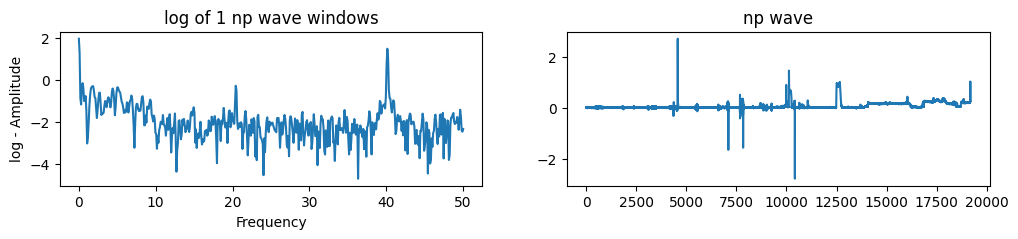

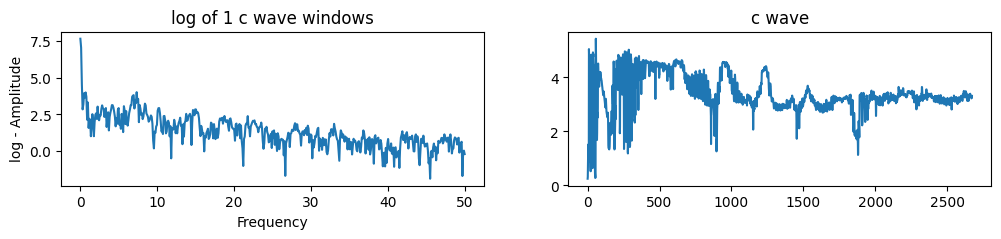

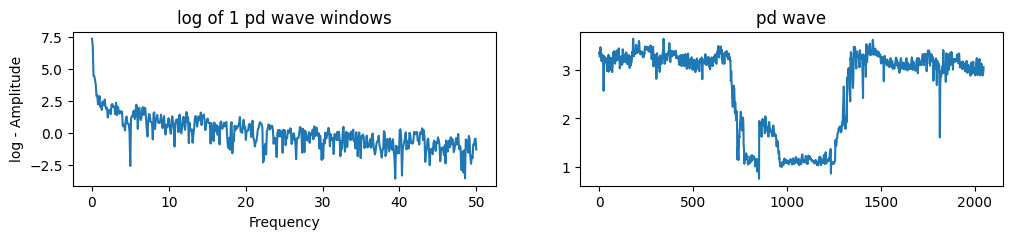

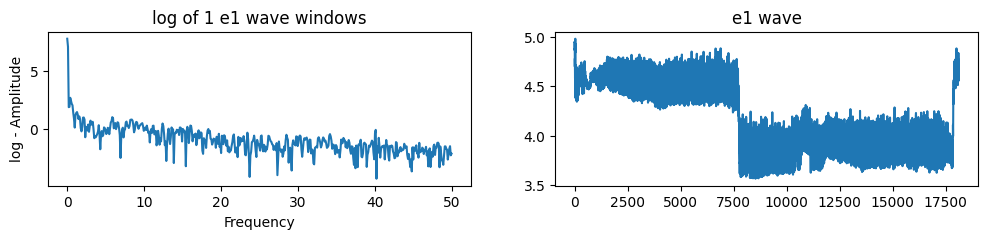

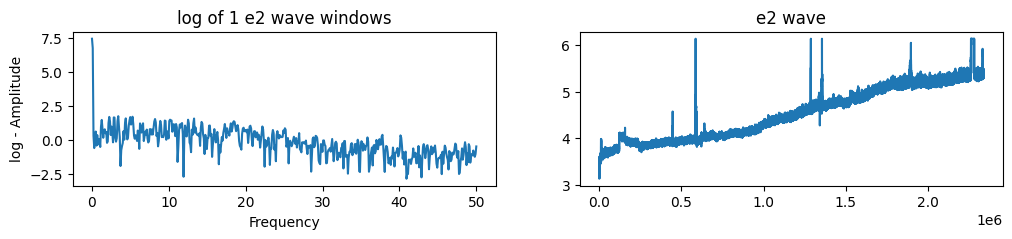

In [52]:
visualization.visualize_fft_coefficients(wave_array,ana,'np',0,False,1)
visualization.visualize_fft_coefficients(wave_array,ana,'c',0,False,1)
visualization.visualize_fft_coefficients(wave_array,ana,'pd',0,False,1)
visualization.visualize_fft_coefficients(wave_array,ana,'e1',0,False,1)
visualization.visualize_fft_coefficients(wave_array,ana,'e2',0,False,1)

n_coefs: 513,n_windows: 9133


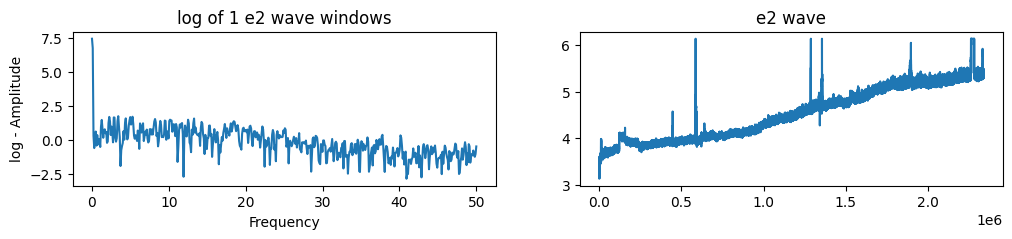

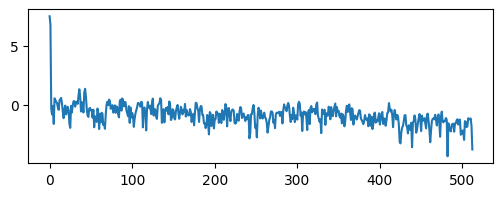

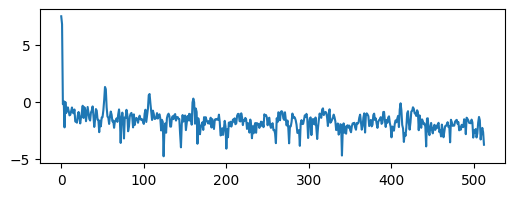

In [160]:
visualization.visualize_fft_coefficients(wave_array,ana,'e2',0,False,n_wind = 1)
i = 2
e2 = preprocessingV1.extract_sample(wave_array,ana,'e2',0)[1024*i:1024*(i+1)]
plt.figure(figsize = (6,2))
plt.plot(np.log(np.abs(librosa.stft(e2,n_fft=1024,center = False))))

i = 30
e2 = preprocessingV1.extract_sample(wave_array,ana,'e2',0)[1024*i:1024*(i+1)]
plt.figure(figsize = (6,2))
plt.plot(np.log(np.abs(librosa.stft(e2,n_fft=1024,center = False))))



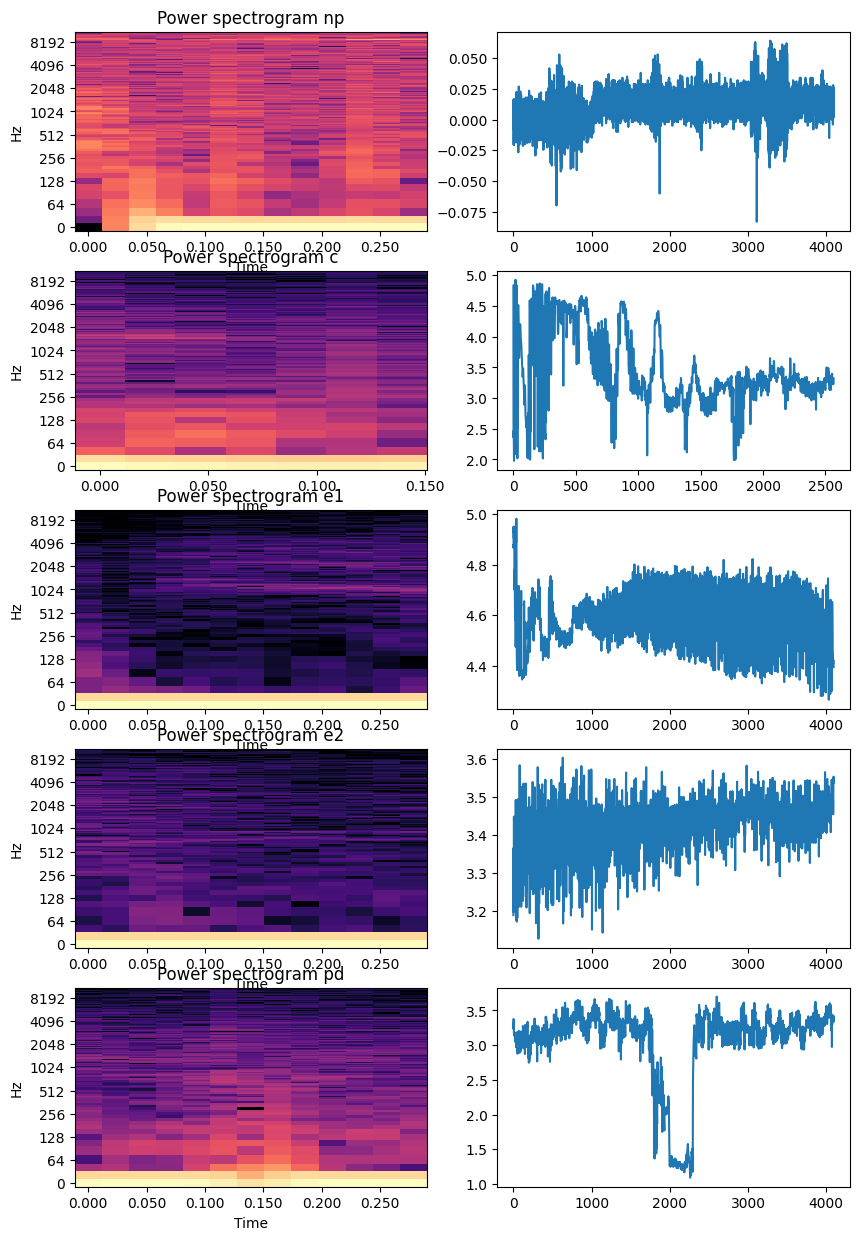

In [185]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5,2,figsize = (10,15))

wt = ['np','c','e1','e2','pd']
sample1 = preprocessingV1.extract_sample(wave_array,ana,'np',0)[0:4096]
coef1 = np.abs(librosa.stft(sample1,n_fft=1024,center = False))
img1 = librosa.display.specshow(librosa.amplitude_to_db(coef1, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0,0])

sample2 = preprocessingV1.extract_sample(wave_array,ana,'c',0)[0:4096]
coef2 = np.abs(librosa.stft(sample2,n_fft=1024,center = False))
img2 = librosa.display.specshow(librosa.amplitude_to_db(coef2, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[1,0])

sample3 = preprocessingV1.extract_sample(wave_array,ana,'e1',0)[0:4096]
coef3 = np.abs(librosa.stft(sample3,n_fft=1024,center = False))
img3 = librosa.display.specshow(librosa.amplitude_to_db(coef3, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[2,0])

sample4 = preprocessingV1.extract_sample(wave_array,ana,'e2',0)[0:4096]
coef4 = np.abs(librosa.stft(sample4,n_fft=1024,center = False))
img4 = librosa.display.specshow(librosa.amplitude_to_db(coef4, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[3,0])

wave_idx = preprocessingV1.get_index(ana)
start, end = wave_idx['pd'][1]
start, end = (start + end)//2 - 2048, (start + end)//2 + 2048
sample5 = wave_array[start:end]
coef5 = np.abs(librosa.stft(sample5,n_fft=1024,center = False))
img5 = librosa.display.specshow(librosa.amplitude_to_db(coef5, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[4,0])
ax[0,1].plot(sample1)
ax[1,1].plot(sample2)
ax[2,1].plot(sample3)
ax[3,1].plot(sample4)
ax[4,1].plot(sample5)
for i in range(5):
    ax[i,0].set_title(f'Power spectrogram {wt[i]}')

plt.show()

In [ ]:
# from scipy.signal import find_peaks
# plt.figure(figsize = (6,3))
# peaks = {c:coef[c] for c in peaks_idx}
# greatest_peaks_idx = sorted(peaks,key=peaks.get,reverse=True)[:5]
# peaks_features = coef[greatest_peaks_idx]
# peaks_features = peaks_features/np.linalg.norm(peaks_features,2)
# sample = extract_sample(wave_array,ana,'c',7)
# coef = np.log(np.abs(librosa.stft(sample,n_fft = 1024,center = False)))
# coef = np.sum(coef,axis = 1)/coef.shape[1] #average
# peaks_idx = find_peaks(coef,prominence = 0.7)[0]
# plt.plot(peaks_idx, coef[peaks_idx ], "xr"); plt.plot(coef); plt.legend(['distance'])

In [ ]:
# from peakdetect import peakdetect
# sample = extract_sample(wave_array,ana,'c',7)
# coef = np.log(np.abs(librosa.stft(sample,n_fft = 1024,center = False)))
# coef = np.sum(coef,axis = 1)/coef.shape[1] #average
# # coef = np.log(np.sum(stft_coef,axis=0))/stft_coef.shape[0]

# peaks = peakdetect(coef, lookahead=15) 
# # Lookahead is the distance to look ahead from a peak to determine if it is the actual peak. 
# # Change lookahead as necessary 
# higherPeaks = np.array(peaks[0])
# lowerPeaks = np.array(peaks[1])
# plt.plot(coef)
# plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')
# plt.plot(lowerPeaks[:,0], lowerPeaks[:,1], 'ko')

In [ ]:
wave_idx = preprocessingV1.get_index(ana)

In [ ]:
def upsample(wave_array):
    up = np.zeros(len(wave_array)*2)
    for i in range(len(wave_array)):
        up[2*i] = wave_array[i]
    for i in range(len(wave_array)-1):
        up[2*i+1] = (up[2*i]+ up[2*i+2])/2
    return up

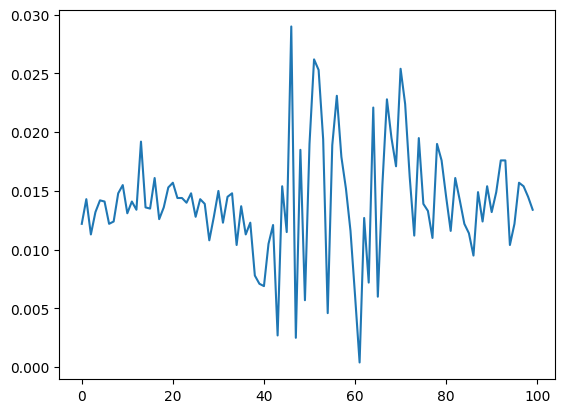

In [ ]:
plt.plot(preprocessingV1.downsampling(sample)[0:100])